# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

Budget: 299.74888385896077
before: 0.46175618100015003
None
Budget: 5062.9478988228675
before: 0.4411995021956489
Sandbags
0.022059975109782446
Budget: 2416.318456293155
before: 0.33164632109880055
None
Budget: 5631.933766486005
before: 0
Sandbags
0.0
Budget: 2914.33695989425
before: 0
None
Budget: 399.99502890559796
before: 0
None
Budget: 4808.507460974437
before: 0.6973386784210797
None
Budget: 429.87735991677283
before: 0.8099563652445263
None
Budget: 1038.337285274617
before: 0.5580873633944303
None
Budget: 1694.923895628966
before: 0.4800617608853641
None
Budget: 687.5214483457933
before: 0.3409245077758421
None
Budget: 2237.455396791884
before: 0
None
Budget: 303.0708034005766
before: 0.628840438445246
None
Budget: 40.848000301565946
before: 0.38415059639796856
None
Budget: 27.97754988097702
before: 0.6273061317175199
None
Budget: 13.093583959466432
before: 0
None
Budget: 2412.638007229971
before: 0.5328583681659221
None
Budget: 162.97472565934856
before: 0.7908978820937141
None


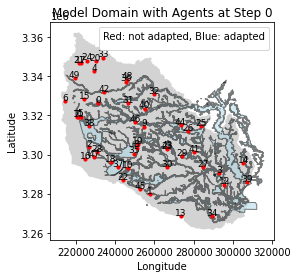

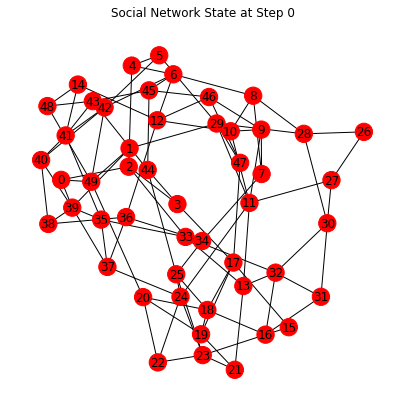

Household 12 checking collaboration, Neighbours: 5
Neighbour 10 wealth: 1880.4484506062681
Neighbour 14 wealth: 375.59037600513756
Neighbour 6 wealth: 9510.089785601484
Neighbour 46 wealth: 4868.653700789864
Neighbour 36 wealth: 7520.91323305985
Total combined wealth for Household 12: 24714.122603674707
Household 48 checking collaboration, Neighbours: 3
Neighbour 49 wealth: 5275.659807366084
Neighbour 14 wealth: 375.59037600513756
Neighbour 43 wealth: 6223.607786927298
Total combined wealth for Household 48: 12645.389452044466
Household 34 checking collaboration, Neighbours: 3
Neighbour 36 wealth: 7520.91323305985
Neighbour 7 wealth: 1864.9437210831347
Neighbour 25 wealth: 618.7149304014497
Total combined wealth for Household 34: 17872.556250852293
Household 29 checking collaboration, Neighbours: 5
Neighbour 28 wealth: 2876.4160191601145
Neighbour 5 wealth: 2148.8172700474715
Neighbour 1 wealth: 7214.649345497305
Neighbour 11 wealth: 8247.763031286322
Neighbour 47 wealth: 9165.57614535

<Figure size 720x432 with 0 Axes>

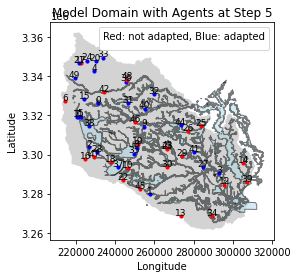

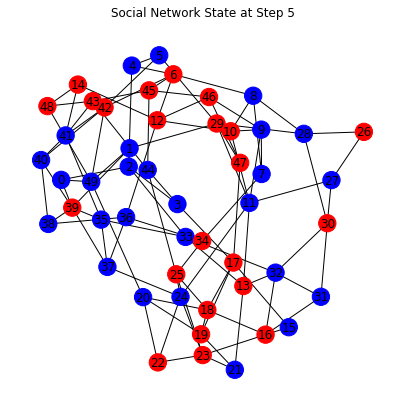

Household 37 checking collaboration, Neighbours: 4
Neighbour 35 wealth: 9227.352692973296
Neighbour 39 wealth: 1830.4022832015512
Neighbour 36 wealth: 8629.801392865282
Neighbour 24 wealth: 2379.8863338347005
Total combined wealth for Household 37: 32644.508528529856
Household 9 checking collaboration, Neighbours: 4
Neighbour 10 wealth: 1918.8082915278278
Neighbour 7 wealth: 8194.01163229286
Neighbour 11 wealth: 8599.925285342833
Neighbour 46 wealth: 6114.930778362864
Total combined wealth for Household 9: 35028.98915116502
Household 23 checking collaboration, Neighbours: 5
Neighbour 22 wealth: 2812.2461457676495
Neighbour 24 wealth: 2379.8863338347005
Neighbour 21 wealth: 4683.943494404379
Neighbour 25 wealth: 1149.5343332446805
Neighbour 16 wealth: 4018.64423139381
Total combined wealth for Household 23: 25150.773947739603
Household 43 checking collaboration, Neighbours: 4
Neighbour 44 wealth: 8656.164809961658
Neighbour 41 wealth: 7249.157032644496
Neighbour 45 wealth: 5282.81270444

<Figure size 720x432 with 0 Axes>

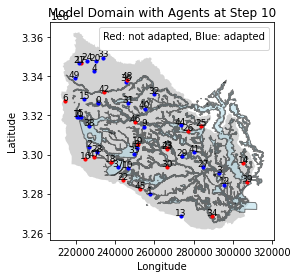

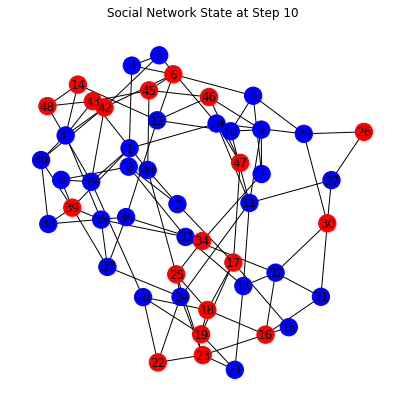

Household 37 checking collaboration, Neighbours: 4
Neighbour 35 wealth: 9378.92183655035
Neighbour 39 wealth: 2719.283616608426
Neighbour 36 wealth: 9738.68955267071
Neighbour 24 wealth: 3485.427320055397
Total combined wealth for Household 37: 36387.4997680847
Household 13 checking collaboration, Neighbours: 4
Neighbour 11 wealth: 8952.087539399345
Neighbour 33 wealth: 5028.09884964128
Neighbour 21 wealth: 5673.13445875417
Neighbour 32 wealth: 4618.621626357201
Total combined wealth for Household 13: 32050.88533476518
Household 29 checking collaboration, Neighbours: 5
Neighbour 28 wealth: 3694.7690703420717
Neighbour 5 wealth: 2587.925465921022
Neighbour 1 wealth: 7330.596219995464
Neighbour 11 wealth: 8952.087539399345
Neighbour 47 wealth: 9581.666055461534
Total combined wealth for Household 29: 38687.17858753533
Household 8 checking collaboration, Neighbours: 4
Neighbour 7 wealth: 8523.079543502583
Neighbour 6 wealth: 11098.557764145206
Neighbour 10 wealth: 7957.168132449387
Neighb

<Figure size 720x432 with 0 Axes>

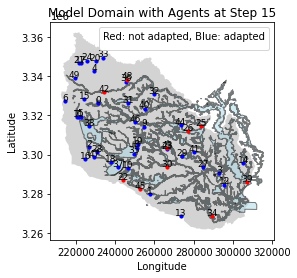

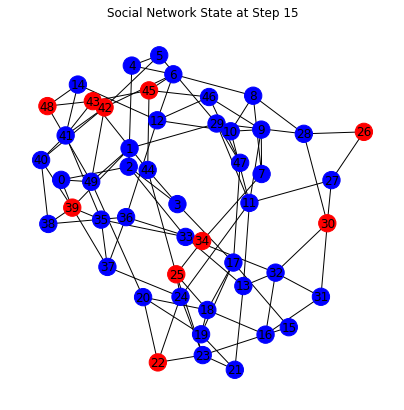

Household 3 checking collaboration, Neighbours: 3
Neighbour 2 wealth: 15271.87928203174
Neighbour 17 wealth: 12566.237776765873
Neighbour 44 wealth: 9381.319791444159
Total combined wealth for Household 3: 57026.80499482826
Household 3 starting collaboration
Household 2 updating collaboration status
Household 2 collaborated at step 15
Household 17 updating collaboration status
Household 17 collaborated at step 15
Household 44 updating collaboration status
Household 44 collaborated at step 15
Household 6 checking collaboration, Neighbours: 5
Neighbour 4 wealth: 5605.7382147894195
Neighbour 8 wealth: 10854.476762360191
Neighbour 12 wealth: 6947.316590858219
Neighbour 42 wealth: 2770.5667782044866
Neighbour 45 wealth: 5565.321495510112
Total combined wealth for Household 6: 43636.211595139495
Household 10 checking collaboration, Neighbours: 4
Neighbour 9 wealth: 11863.650973835205
Neighbour 11 wealth: 9304.249793455856
Neighbour 8 wealth: 10854.476762360191
Neighbour 12 wealth: 6947.31659

<Figure size 720x432 with 0 Axes>

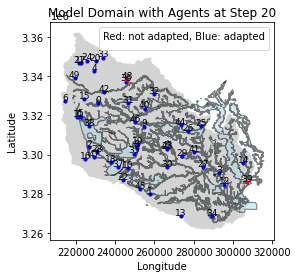

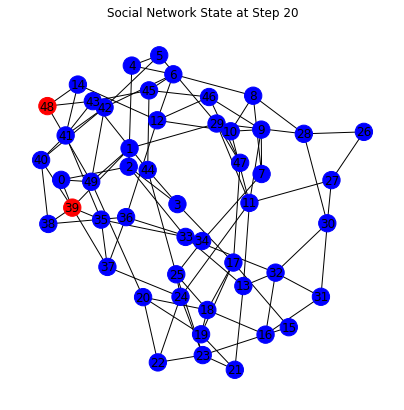

Household 23 checking collaboration, Neighbours: 5
Neighbour 22 wealth: 10309.672089449828
Neighbour 24 wealth: 5696.509292496787
Neighbour 21 wealth: 7651.516387453752
Neighbour 25 wealth: 8741.992541774376
Neighbour 16 wealth: 12558.188666847862
Total combined wealth for Household 23: 56509.34231004265
Household 23 starting collaboration
Household 22 updating collaboration status
Household 22 collaborated at step 20
Household 24 updating collaboration status
Household 24 collaborated at step 20
Household 21 updating collaboration status
Household 21 collaborated at step 20
Household 25 updating collaboration status
Household 25 collaborated at step 20
Household 16 updating collaboration status
Household 16 collaborated at step 20
Household 41 checking collaboration, Neighbours: 5
Neighbour 40 wealth: 8944.258495946764
Neighbour 42 wealth: 3543.483368725261
Neighbour 43 wealth: 11863.132353776942
Neighbour 35 wealth: 9682.060123704456
Neighbour 14 wealth: 7714.482372057321
Total combi

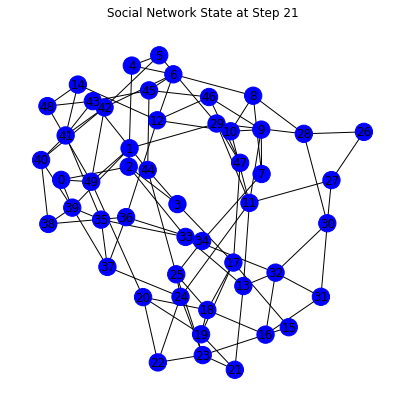

Household 4 checking collaboration, Neighbours: 3
Neighbour 5 wealth: 3070.9444813819273
Neighbour 2 wealth: 16217.027730588608
Neighbour 6 wealth: 12845.8725405433
Total combined wealth for Household 4: 38169.38633547183
Household 40 checking collaboration, Neighbours: 4
Neighbour 39 wealth: 10674.82255010355
Neighbour 41 wealth: 11269.579235616493
Neighbour 38 wealth: 12263.678056838626
Neighbour 42 wealth: 3698.0666868294156
Total combined wealth for Household 40: 46977.30727147014
Household 13 checking collaboration, Neighbours: 4
Neighbour 11 wealth: 9726.84449832367
Neighbour 33 wealth: 6884.3178908678365
Neighbour 21 wealth: 7849.35458032371
Neighbour 32 wealth: 7502.985693281751
Total combined wealth for Household 13: 41444.14190107088
Household 27 checking collaboration, Neighbours: 3
Neighbour 26 wealth: 14031.487509079365
Neighbour 30 wealth: 8416.175185714274
Neighbour 11 wealth: 9726.84449832367
Total combined wealth for Household 27: 44773.20131510899
Household 22 checkin

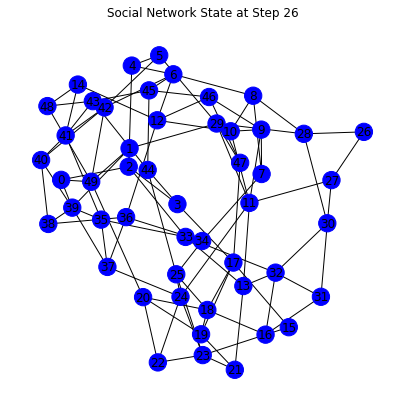

Household 2 checking collaboration, Neighbours: 5
Neighbour 1 wealth: 7516.111219192518
Neighbour 3 wealth: 22609.936456551924
Neighbour 0 wealth: 16500.595129738915
Neighbour 4 wealth: 6393.711056431798
Neighbour 33 wealth: 7728.053818698089
Total combined wealth for Household 2: 77753.05911833257
Household 2 starting collaboration
Household 1 updating collaboration status
Household 1 collaborated at step 26
Household 3 updating collaboration status
Household 3 collaborated at step 26
Household 0 updating collaboration status
Household 0 collaborated at step 26
Household 4 updating collaboration status
Household 4 collaborated at step 26
Household 33 updating collaboration status
Household 33 collaborated at step 26
Household 36 checking collaboration, Neighbours: 4
Neighbour 34 wealth: 9098.948940034126
Neighbour 38 wealth: 13137.583243341378
Neighbour 12 wealth: 7232.5022485720365
Neighbour 37 wealth: 12627.134615143159
Total combined wealth for Household 36: 55383.30071113878
House

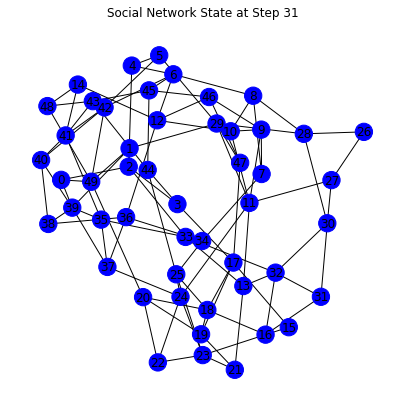

Household 7 checking collaboration, Neighbours: 3
Neighbour 8 wealth: 14578.94874270132
Neighbour 9 wealth: 14523.391470149714
Neighbour 34 wealth: 9335.672896519947
Total combined wealth for Household 7: 48343.1778799544
Household 17 checking collaboration, Neighbours: 5
Neighbour 18 wealth: 9978.004863408416
Neighbour 15 wealth: 11750.682043947785
Neighbour 19 wealth: 3309.772468744898
Neighbour 3 wealth: 23883.83114380894
Neighbour 47 wealth: 10455.45486669239
Total combined wealth for Household 17: 76078.822417735
Household 17 starting collaboration
Household 18 updating collaboration status
Household 18 collaborated at step 31
Household 15 updating collaboration status
Household 15 collaborated at step 31
Household 19 updating collaboration status
Household 19 collaborated at step 31
Household 3 updating collaboration status
Household 3 collaborated at step 31
Household 47 updating collaboration status
Household 47 collaborated at step 31
Household 40 checking collaboration, Neigh

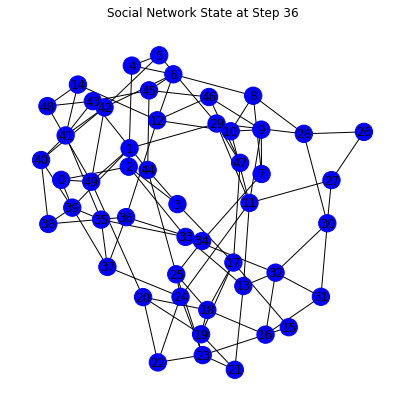

Household 6 checking collaboration, Neighbours: 5
Neighbour 4 wealth: 7110.050003379415
Neighbour 8 wealth: 15742.846236557922
Neighbour 12 wealth: 7491.76193740278
Neighbour 42 wealth: 6016.816458391744
Neighbour 45 wealth: 6158.589956737028
Total combined wealth for Household 6: 57748.63910082777
Household 6 starting collaboration
Household 4 updating collaboration status
Household 4 collaborated at step 36
Household 8 updating collaboration status
Household 8 collaborated at step 36
Household 12 updating collaboration status
Household 12 collaborated at step 36
Household 42 updating collaboration status
Household 42 collaborated at step 36
Household 45 updating collaboration status
Household 45 collaborated at step 36
Household 33 checking collaboration, Neighbours: 4
Neighbour 32 wealth: 11436.209420906125
Neighbour 35 wealth: 10167.081383151026
Neighbour 13 wealth: 11801.134298720344
Neighbour 2 wealth: 18579.898851980804
Total combined wealth for Household 33: 61399.84962911689
H

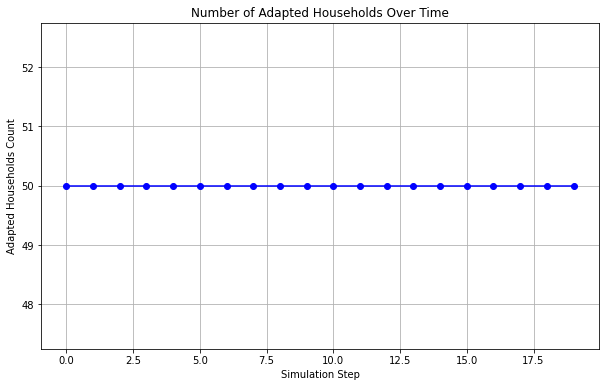

In [5]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from agents import Households
from agents import Government

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# # Define a function to plot agents on the network.
# # This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
        # Clear the current axes.
        ax.clear()
        # Determine the color of each node (agent) based on their adaptation status.
        colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents if isinstance(agent, Households)]
        # Draw the network with node colors and labels.
        nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
        # Set the title of the plot with the current step number.
        ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

 # Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

#government_agent = Government(unique_id="gov_1", model=model)
#model.schedule.add(government_agent)
#government_agent.support_non_adapted_households()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    for measure, count in model.flood_measure_count.items():
        print(f"{measure}: {count} times purchased")
    # Assuming 'model' is your AdaptationModel instance

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

# Initialize a list to store the count of adapted households at each step
adapted_counts = []

# Run the model and collect data
for step in range(20):
    model.step()
    adapted_count = sum(1 for agent in model.schedule.agents if isinstance(agent, Households) and agent.is_adapted)
    adapted_counts.append(adapted_count)

    # Display network plots at specified intervals
    if (step +1) % 5 == 0:
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

# Plot the line graph of adapted households over time
plt.figure(figsize=(10, 6))
plt.plot(range(20), adapted_counts, marker='o', linestyle='-', color='blue')
plt.title('Number of Adapted Households Over Time')
plt.xlabel('Simulation Step')
plt.ylabel('Adapted Households Count')
plt.grid(True)
plt.show()







In [4]:
agent_data = model.datacollector.get_model_vars_dataframe()
agent_data


,total_adapted_households
0,22
1,26
2,27
3,27
4,30
5,30
6,31
7,31
8,34
9,37


In [3]:
model_data = model.datacollector.get_agent_vars_dataframe()
model_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
1    0                   0.524830              0.535739          0.000000   
     1                   0.000000              0.000000          0.000000   
     2                   0.258411              0.412031          0.000000   
     3                   0.157280              0.325338          0.000000   
     4                   0.414719              0.494625          0.000000   
...                           ...                   ...               ...   
20   46                  0.000000             -8.800000          0.000000   
     47                  0.510752            -21.869009          0.524671   
     48                  1.315977            -13.565188          0.907545   
     49                  0.437910            -11.495874          0.317019   
     gov_1                    NaN                   NaN               NaN   

              FloodDamageActual IsAdapted  FriendsCount  \
Step AgentID                                              
1    0                 0.000000      True           3.0   
     1                 0.000000      True           4.0   
     2                 0.000000      True           4.0   
     3                 0.000000      True           3.0   
     4                 0.000000     False           4.0   
...                         ...       ...           ...   
20   46                0.000000      True           4.0   
     47                0.535686      True           3.0   
     48                0.631362      True           2.0   
     49                0.447721      True           4.0   
     gov_1                  NaN      None           NaN   

                                                   location        wealth  \
Step AgentID                                                                
1    0        POINT (290109.06917555345 3302791.4506981135)   9102.671388   
     1           POINT (260345.624891053 3303076.430332035)   2868.302238   
     2         POINT (234840.4787965256 3310208.1795782144)   6230.347073   
     3          POINT (228098.2726529612 3329642.779940264)  12842.941811   
     4         POINT (222096.27519425016 3329517.361337947)   6621.325160   
...                                                     ...           ...   
20   46        POINT (217365.0377328304 3316508.9027954196)   8442.529982   
     47        POINT (308272.16815403587 3295612.357545802)  12253.729906   
     48         POINT (237289.4080559047 3289944.529023522)   8907.909942   
     49        POINT (271787.09093317884 3299082.395329046)  12155.443536   
     gov_1                                             None           NaN   

                   selected_measure reduction_factors household_info  
Step AgentID                                                          
1    0                         None              None           None  
     1                         None              None           None  
     2                         None              None           None  
     3                         None              None           None  
     4                         None              None           None  
...                             ...               ...            ...  
20   46       Collaborative project              None           None  
     47       Collaborative project              None           None  
     48       Collaborative project              None           None  
     49       Collaborative project              None           None  
     gov_1                     None              None           None  

[1020 rows x 11 columns]